In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *

In [3]:
df = pd.read_csv("data/svd10.csv")
exp = setup(df, target="likes_count", session_id=7, log_experiment=True, experiment_name="qiita", use_gpu=True)

,Description,Value
0,session_id,7
1,Target,likes_count
2,Original Data,"(140801, 37)"
3,Missing Values,False
4,Numeric Features,34
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(98560, 47)"


In [4]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,9.7817,1666.8623,40.6792,0.1809,1.1860,2.3331,1.1080
gbr,Gradient Boosting Regressor,10.0725,1692.8144,40.9632,0.1711,1.2641,2.6001,74.1300
rf,Random Forest Regressor,10.5271,1696.1539,41.0241,0.1677,1.2120,2.8070,51.5380
et,Extra Trees Regressor,10.4254,1715.7954,41.2683,0.1574,1.2242,2.7919,23.1200
xgboost,Extreme Gradient Boosting,10.7379,1769.1959,41.9141,0.1292,1.2505,2.8598,0.9900
br,Bayesian Ridge,11.5563,1938.4208,43.8299,0.0517,1.5200,3.2020,0.1790
lr,Linear Regression,11.5935,1938.4758,43.8309,0.0516,1.5208,3.2230,0.1490
ridge,Ridge Regression,11.5871,1938.4210,43.8302,0.0516,1.5205,3.2196,0.0360
omp,Orthogonal Matching Pursuit,11.6152,1950.1614,43.9613,0.0460,1.5545,3.1876,0.0430
en,Elastic Net,11.6517,1964.9958,44.1286,0.0387,1.6037,3.1228,0.0460


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', importance_type='split', learning_rate=0.1,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [5]:
model = create_model("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.4121,1287.7896,35.8858,0.1853,1.1750,2.2879
1,10.2774,2024.0193,44.9891,0.1439,1.1833,2.3673
2,10.2487,2020.1732,44.9463,0.2214,1.1923,2.2956
3,9.6431,1502.0070,38.7557,0.1915,1.1923,2.3662
4,9.5090,1533.6320,39.1616,0.2255,1.1968,2.3881
5,10.1556,2046.8542,45.2422,0.2304,1.1744,2.2908
6,9.3201,1396.0135,37.3633,0.1622,1.1675,2.2384
7,9.5184,1456.4452,38.1634,0.1573,1.1987,2.3878
8,9.6419,1466.1928,38.2909,0.1056,1.1881,2.3457


In [6]:
print(model)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              device='gpu', importance_type='split', learning_rate=0.1,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=7, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)


In [7]:
tuned_model = tune_model(model, optimize="RMSE")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.5959,1251.3000,35.3737,0.2084,1.2258,2.4459
1,10.2081,2053.5411,45.3160,0.1314,1.2334,2.4350
2,10.3155,2078.1723,45.5870,0.1991,1.2370,2.3289
3,9.7901,1496.4055,38.6834,0.1946,1.2411,2.4752
4,9.6456,1557.9533,39.4709,0.2132,1.2448,2.5198
5,10.5503,2182.3593,46.7157,0.1794,1.2300,2.4547
6,9.3765,1339.8522,36.6040,0.1959,1.2258,2.4232
7,9.6138,1452.5022,38.1117,0.1596,1.2474,2.4676
8,9.9392,1460.6096,38.2179,0.1090,1.2451,2.5500


In [8]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,10.4471,2072.2962,45.5225,0.2056,1.2373,2.4045


,created_time,followers_count,items_count,created_days_ago,title_0,title_1,title_2,title_3,title_4,title_5,...,created_month_2,created_month_3,created_month_4,created_month_5,created_month_6,created_month_7,created_month_8,created_month_9,likes_count,Label
0,23.0,227.0,120.0,935.0,-1.269018e-14,-3.549793e-15,3.806889e-14,7.009415e-14,1.514990e-13,-2.769710e-14,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,17.147701
1,0.0,0.0,17.0,810.0,1.151898e-03,1.588190e-03,1.876167e-03,1.404750e-03,3.176754e-03,2.298510e-03,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.157391
2,18.0,7.0,71.0,804.0,-1.503105e-15,2.668088e-15,-3.061083e-14,-3.011454e-14,1.981519e-13,-1.262822e-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.312712
3,19.0,0.0,34.0,1028.0,9.170454e-10,-6.592763e-11,-1.085943e-10,2.095823e-10,-4.726555e-10,-4.911411e-10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.621517
4,10.0,2.0,8.0,858.0,1.443187e-15,2.137397e-14,2.707377e-15,-1.662753e-14,6.011959e-14,3.318485e-15,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.450021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42236,0.0,2.0,11.0,718.0,1.966555e-01,-3.247387e-02,-2.007999e-02,-8.284094e-03,-2.949519e-02,-7.856628e-02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.840974
42237,23.0,46.0,27.0,967.0,-9.838312e-15,-1.670744e-14,8.988345e-15,2.194966e-14,2.070443e-14,-1.007054e-13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,13.671081
42238,16.0,0.0,1.0,711.0,4.803428e-15,-6.661785e-15,-5.579694e-14,-2.930787e-14,-1.171509e-14,-1.723982e-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.045757
42239,14.0,7.0,20.0,875.0,3.396189e-03,2.641579e-03,1.854768e-03,3.623822e-03,2.951457e-03,3.059247e-03,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.085532


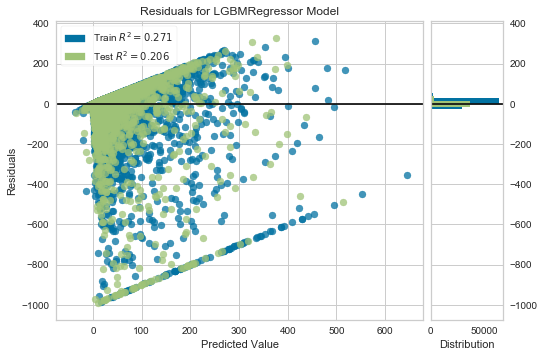

In [9]:
plot_model(tuned_model)